In [32]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [33]:
raw_data=pd.read_csv('C:/Users/HP/Documents/backups/big_startup_secsees_dataset.csv')

In [34]:
raw_data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [35]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


In [36]:
raw_data.describe(include='all')

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
count,66368,66367,61310,63220,66368,66368,59410,57821,58338,58340,66368.000000,51147,66344,66368
unique,66368,66102,61191,27296,18896,4,137,311,1092,5111,NaN,3978,4817,4518
top,/organization/-fame,Blink,http://www.askforoffer.com,Software,-,operating,USA,CA,SF Bay Area,San Francisco,NaN,2012-01-01,2014-01-01,2014-01-01
freq,1,4,5,3995,12785,53034,37601,12900,8804,3526,NaN,2730,565,483
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.732522,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.360251,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN


In [37]:
raw_data.isna().sum()

permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd        0
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15221
first_funding_at        24
last_funding_at          0
dtype: int64

In [38]:
raw_data=raw_data.dropna(subset=['category_list'],axis=0)
raw_data=raw_data.dropna(subset=['region'],axis=0)
raw_data=raw_data.dropna(subset=['country_code'],axis=0)

In [39]:
raw_data.isna().sum()

permalink                0
name                     1
homepage_url          3271
category_list            0
funding_total_usd        0
status                   0
country_code             0
state_code             785
region                   0
city                     0
funding_rounds           0
founded_at           10856
first_funding_at        22
last_funding_at          0
dtype: int64

<BarContainer object of 4 artists>

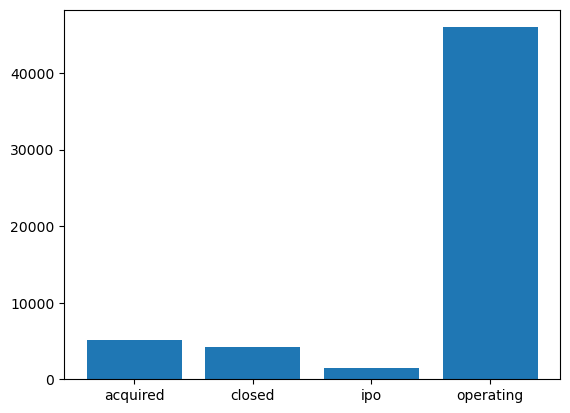

In [40]:
company_status = raw_data[['status', 'permalink']].groupby('status').count().reset_index()
plt.bar(company_status.status, company_status.permalink)

In [41]:
world_data=raw_data.loc[raw_data.status.isin(['ipo','acquired','operating','closed'])][['country_code', 'status', 'permalink']]\
.groupby(['country_code']).count().reset_index().sort_values('permalink', ascending=False)
world_data

,country_code,status,permalink
124,USA,36548,36548
41,GBR,3397,3397
19,CAN,1863,1863
54,IND,1533,1533
22,CHN,1354,1354
...,...,...,...
100,QAT,1,1
99,PRY,1,1
76,MAF,1,1
91,OMN,1,1


In [42]:
india_startup=raw_data[raw_data['country_code']=='IND'].reset_index()
india_startup

,index,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,22,/organization/1000lookz,1000Lookz,http://1000lookz.com,Beauty,-,operating,IND,25,Chennai,Chennai,1,2008-01-01,2013-07-22,2013-07-22
2,93,/organization/1click,1CLICK,http://1click.io,Chat|Mobile,-,acquired,IND,19,Bangalore,Bangalore,1,2012-11-01,2014-01-26,2014-01-26
3,135,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,6369507,operating,IND,10,New Delhi,Gurgaon,1,2012-06-01,2012-11-15,2012-11-15
4,151,/organization/247-learning-private,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,4000000,operating,IND,19,Bangalore,Bangalore,1,2001-01-01,2007-11-06,2007-11-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528,66240,/organization/zoutons,Zoutons,http://zoutons.com,E-Commerce|Online Shopping|Sales and Marketing,3300000,operating,IND,7,New Delhi,New Delhi,1,2013-01-01,2013-09-06,2013-09-06
1529,66284,/organization/zumbl,Zumbl,http://zumbl.com,Chat|Entertainment|Interest Graph|Messaging,140000,operating,IND,10,New Delhi,Gurgaon,3,2012-11-01,2013-04-03,2014-04-05
1530,66301,/organization/zupermeal,ZuperMeal,http://www.zupermeal.com,Food Processing,2000000,operating,IND,16,IND - Other,Andheri,1,NaN,2015-10-08,2015-10-08
1531,66318,/organization/zuvvu,Zuvvu,http://zuvvu.com,Advertising|Social Media Advertising|Social Me...,12000,closed,IND,9,Ahmedabad,Ahmadabad,1,2010-06-01,2011-11-01,2011-11-01


In [43]:
fig_pie=go.Figure(go.Pie(title='India startup chart',labels=india_startup['status'],hole=0.5))
fig_pie.update_layout(
                      autosize=False,
                      width=400,
                      height=400)
fig_pie.update_traces(textposition='outside')
fig_pie.show()

In [44]:
fig_bar=px.histogram(title='Startup status with respect to state',x=india_startup['region'],color=india_startup['status'])
fig_bar.show()

In [45]:
indian_operating_statup=india_startup[india_startup['status']=='operating']

In [46]:
indian_operating_statup

,index,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,22,/organization/1000lookz,1000Lookz,http://1000lookz.com,Beauty,-,operating,IND,25,Chennai,Chennai,1,2008-01-01,2013-07-22,2013-07-22
3,135,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,6369507,operating,IND,10,New Delhi,Gurgaon,1,2012-06-01,2012-11-15,2012-11-15
4,151,/organization/247-learning-private,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,4000000,operating,IND,19,Bangalore,Bangalore,1,2001-01-01,2007-11-06,2007-11-06
5,219,/organization/33coupons,33Coupons,http://33coupons.in,Internet,20000,operating,IND,36,Kanpur,Kanpur,1,2015-05-01,2015-07-06,2015-07-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,66236,/organization/zostel,Zostel,http://zostel.com/,E-Commerce,1000000,operating,IND,24,Jaipur,Jaipur,1,2013-08-01,2014-05-13,2014-05-13
1528,66240,/organization/zoutons,Zoutons,http://zoutons.com,E-Commerce|Online Shopping|Sales and Marketing,3300000,operating,IND,7,New Delhi,New Delhi,1,2013-01-01,2013-09-06,2013-09-06
1529,66284,/organization/zumbl,Zumbl,http://zumbl.com,Chat|Entertainment|Interest Graph|Messaging,140000,operating,IND,10,New Delhi,Gurgaon,3,2012-11-01,2013-04-03,2014-04-05
1530,66301,/organization/zupermeal,ZuperMeal,http://www.zupermeal.com,Food Processing,2000000,operating,IND,16,IND - Other,Andheri,1,NaN,2015-10-08,2015-10-08


In [47]:
fig_hist=px.histogram(title='start up opearting in various sectors',x=indian_operating_statup['category_list'],color=indian_operating_statup['status'])
fig_hist.update_layout(
                       autosize=False,
                       width=1200,
                       height=1200)
fig_hist.show()

In [48]:
Closed_category_data=india_startup[india_startup['status']=='closed']
Closed_category_data

,index,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
13,697,/organization/abc-live,ABC Live,http://abclive.in,Advertising,25000,closed,IND,5,Chandigarh,Chandigarh,1,2007-12-05,2007-01-05,2007-01-05
23,1380,/organization/adhysteria,Adhysteria,http://www.adhysteria.com,Classifieds|Curated Web|Video,10000,closed,IND,16,Mumbai,Mumbai,1,2007-09-01,2007-07-01,2007-07-01
44,2703,/organization/alsbridge,Alsbridge,http://www.alsbridge.com,BPO Services|Consulting|Outsourcing,-,closed,IND,10,New Delhi,Gurgaon,1,2003-01-01,2013-01-08,2013-01-08
92,5148,/organization/autoportal-com,Autoportal.com,http://www.autoportal.com,Automotive|E-Commerce,-,closed,IND,10,New Delhi,Gurgaon,1,2013-11-18,2013-11-18,2013-11-18
119,6499,/organization/bestylish-com,beStylish.com,http://www.bestylish.com,E-Commerce|Fashion|Shoes,10000000,closed,IND,10,New Delhi,Gurgaon,1,2011-05-10,2012-06-01,2012-06-01
141,7341,/organization/black-is-pink,Black is Pink,http://blackispink.com/,E-Commerce|Fashion|Internet|Lifestyle,40000,closed,IND,7,New Delhi,New Delhi,1,2015-09-01,2015-02-15,2015-02-15
246,12504,/organization/comat-technologies,Comat Technologies,http://www.comat.com,Governments|Health and Insurance,25000000,closed,IND,19,Bangalore,Bangalore,3,1996-01-01,2007-03-10,2008-10-01
255,13249,/organization/cooptions-technologies,Cooptions Technologies,http://www.cooptionstech.com,Software,10000000,closed,IND,2,Hyderabad,Hyderabad,1,1999-01-01,2009-11-23,2009-11-23
274,14181,/organization/cultivate-it-solutions-managemen...,Cultivate IT Solutions & Management Pvt. Ltd.,http://cultivate.co.in,Information Technology|Software,20000,closed,IND,36,Ghaziabad,Ghaziabad,1,2010-01-01,2010-03-31,2010-03-31
291,14695,/organization/das-group-of-solutions,DAS GROUP OF SOLUTIONS,http://www.dasgroupsollutions.com,Advice|Internet Marketing|Marketing Automation,5118761,closed,IND,16,Mumbai,Mumbai,1,2015-03-06,2015-03-20,2015-03-20


In [49]:
fig_closed=go.Figure(go.Pie(title='Catogory wise closed',labels=Closed_category_data['category_list'],hole=0.5))
fig_closed.update_traces(textposition='outside')
fig_closed.show()

In [50]:
avg_fundingstat=india_startup

In [51]:
avg_fundingstat=avg_fundingstat.dropna(subset=['founded_at','first_funding_at'],axis=0,how='any')

In [52]:
avg_fundingstat.isna().sum()

index                 0
permalink             0
name                  0
homepage_url         13
category_list         0
funding_total_usd     0
status                0
country_code          0
state_code            0
region                0
city                  0
funding_rounds        0
founded_at            0
first_funding_at      0
last_funding_at       0
dtype: int64

In [53]:
avg_fundingstat['founded_at']=pd.to_datetime(avg_fundingstat['founded_at'],errors='coerce')
avg_fundingstat['founded_at']=pd.to_datetime(avg_fundingstat['founded_at'])

C:\Users\HP\AppData\Local\Temp\ipykernel_15356\1373584056.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_15356\1373584056.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
avg_fundingstat['founded_year']=avg_fundingstat['founded_at'].dt.year  #to seperate year from date

C:\Users\HP\AppData\Local\Temp\ipykernel_15356\3295375786.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
avg_fundingstat

,index,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_year
1,22,/organization/1000lookz,1000Lookz,http://1000lookz.com,Beauty,-,operating,IND,25,Chennai,Chennai,1,2008-01-01,2013-07-22,2013-07-22,2008
2,93,/organization/1click,1CLICK,http://1click.io,Chat|Mobile,-,acquired,IND,19,Bangalore,Bangalore,1,2012-11-01,2014-01-26,2014-01-26,2012
3,135,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,6369507,operating,IND,10,New Delhi,Gurgaon,1,2012-06-01,2012-11-15,2012-11-15,2012
4,151,/organization/247-learning-private,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,4000000,operating,IND,19,Bangalore,Bangalore,1,2001-01-01,2007-11-06,2007-11-06,2001
5,219,/organization/33coupons,33Coupons,http://33coupons.in,Internet,20000,operating,IND,36,Kanpur,Kanpur,1,2015-05-01,2015-07-06,2015-07-06,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,66231,/organization/zopper,Zopper,http://www.zopper.com/,Mobile,20000000,operating,IND,36,New Delhi,Noida,1,2011-01-01,2015-06-04,2015-06-04,2011
1527,66236,/organization/zostel,Zostel,http://zostel.com/,E-Commerce,1000000,operating,IND,24,Jaipur,Jaipur,1,2013-08-01,2014-05-13,2014-05-13,2013
1528,66240,/organization/zoutons,Zoutons,http://zoutons.com,E-Commerce|Online Shopping|Sales and Marketing,3300000,operating,IND,7,New Delhi,New Delhi,1,2013-01-01,2013-09-06,2013-09-06,2013
1529,66284,/organization/zumbl,Zumbl,http://zumbl.com,Chat|Entertainment|Interest Graph|Messaging,140000,operating,IND,10,New Delhi,Gurgaon,3,2012-11-01,2013-04-03,2014-04-05,2012


In [56]:
avg_fundingstat['first_funding_at']=pd.to_datetime(avg_fundingstat['first_funding_at'],errors='coerce')
avg_fundingstat['first_funding_at']=pd.to_datetime(avg_fundingstat['first_funding_at'])
avg_fundingstat['first_funding_year']=avg_fundingstat['first_funding_at'].dt.year

C:\Users\HP\AppData\Local\Temp\ipykernel_15356\1370028169.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_15356\1370028169.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_15356\1370028169.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [57]:
avg_fundingstat['founded_year'].value_counts().head(5)    #more statup found at year 2012

2012    202
2014    181
2013    178
2011    133
2010    102
Name: founded_year, dtype: int64

In [58]:
avg_waiting_period=avg_fundingstat['first_funding_year']-avg_fundingstat['founded_year']

In [59]:
avg_fundingstat['avg_waiting_period']=avg_waiting_period

C:\Users\HP\AppData\Local\Temp\ipykernel_15356\467203477.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
avg_fundingstat['avg_waiting_period'].mean()

3.3712480252764614

In [61]:
fig=px.scatter(avg_fundingstat,x='category_list',y=avg_waiting_period,color='region',animation_frame='region',width=800,height=1200)
fig.show()